## Missing Value Handler

In this document, I will make a documentation about missing value handling process using python. The data that I used is dummy data generated from manually (simulation data).

Basically to handle missing value, as a fundamental, there are four options:
1. Drop the cell
2. Fill in with mean (average)
3. Fill in with median (Q2)
4. Fill in with mode (the number that high occurence appeared)

In [1]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the file data
df = pd.read_csv('missing_simulasi.csv')

In [3]:
df.head(5)

,x1,x2,x3,x4,x5
0,3.0,3.0,7.0,1.0,3.0
1,4.0,4.0,7.0,2.0,4.0
2,12.0,5.0,7.0,3.0,5.0
3,3.0,5.0,7.0,2.0,5.0
4,5.0,7.0,7.0,1.0,7.0


In [4]:
df.sample(5)

,x1,x2,x3,x4,x5
56,7.0,4.0,NaN,4.0,4.0
15,6.0,8.0,5.0,3.0,3.0
71,100.0,8.0,NaN,3.0,3.0
43,3.0,4.0,6.0,2000.0,9.0
11,6.0,1.0,4.0,2.0,4.0


We can see that there's a possibility cell contains missing value

## Check the table information

In [5]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
dtype: object

In [6]:
df.describe()

,x1,x2,x3,x4,x5
count,73.000000,65.000000,62.000000,72.000000,80.000000
mean,70.534247,4.876923,5.596774,187.291667,5.887500
std,238.651890,2.375051,2.343178,591.787682,3.371488
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,4.000000,2.000000,3.000000
50%,4.000000,4.000000,7.000000,3.000000,5.000000
75%,7.000000,7.000000,7.000000,5.000000,8.000000
max,1000.000000,9.000000,10.000000,4000.000000,15.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      73 non-null     float64
 1   x2      65 non-null     float64
 2   x3      62 non-null     float64
 3   x4      72 non-null     float64
 4   x5      80 non-null     float64
dtypes: float64(5)
memory usage: 3.3 KB


From the info, we can see that the number of non-null data is different in each attribute, meaning there are a lot of missing value in particular attribute

In [8]:
#Missing value counting

pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T

,x1,x2,x3,x4,x5
Missing Values,8,16,19,9,1


## First Handle : X1 Handling

In X1, we can see there are 8 missing value. This number actually too high and we can not drop all the cell. If we drop it we will miss around 30% of the data. So we will try to plot using boxplot to see the distribution. If there is no outlier, we will use mean(average) to fill, if there are outliers we will fill with median (because median will not impacted by outliers), if the distribution has no outlier and there is a mode, we can use mode to fill.

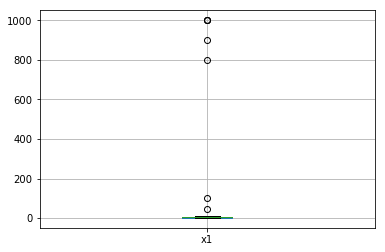

In [9]:
#boxplot X1
df[['x1']].boxplot()
plt.show()

there are outlier in the data, we can see from the boxplot so we will fill the missing with median

In [10]:
# fill with median
df['x1'] = df['x1'].fillna(df['x1'].median())

In [14]:
#see the result
#Missing value counting

pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T

,x1,x2,x3,x4,x5
Missing Values,0,16,19,9,1


## Second Handle : X2 Handling

In X2 there are 16 missing values, so we can't drop the cell. First we will check the boxplot and then the stastic descriptive

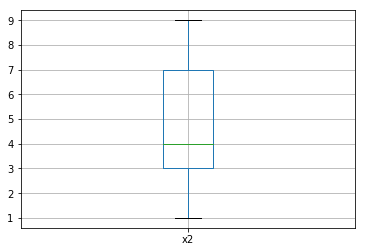

In [15]:
#boxplot X1
df[['x2']].boxplot()
plt.show()

There is no outlier in the boxplot, so we can fill the missing value with mean/average.

In [16]:
# fill with mean
df['x2'] = df['x2'].fillna(df['x2'].mean())

In [17]:
#see the result
#Missing value counting

pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T

,x1,x2,x3,x4,x5
Missing Values,0,0,19,9,1


## Third Handle : X5 Handling

In x5, all of us know that only 1 missing value. Because the number of missing value is too small, actuallu we can drop the cell without giving the back fill into the cell.

In [19]:
# drop
get_index = df[df['x5'].isnull()].index #record the miss value index
df.drop(get_index, axis = 0, inplace = True) #drop the cell